In [1]:
import pickle
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
matplotlib.rcParams.update({'font.size':20})

In [2]:
wells = ['0034','0027','0016','0008','0001',
         '0055','0054','0039']
conditions = ['Col\n0.5 mg/ml', 'Col\n0.75 mg/ml', 'Col\n1 mg/ml', 'Col\n1.5 mg/ml', 'Col\n2 mg/ml',    
            'SilkCol\n5/1', 'SilkCol\n7.5/1', 'SilkCol\n10/1']

In [3]:
den_vals = list()

for i in range(len(wells)):
    
    well = wells[i]
    cond = conditions[i]
    FEATNAMES = well + '_cropped_fibFeatNames.csv'
    FIBFEATS = well + '_cropped_fibFeatures.csv'
    df_FEATNAMES = pd.read_csv(FEATNAMES, header=None)
    df_FIBFEATS = pd.read_csv(FIBFEATS, header=None)
    
    headings = list()
    for f_name in list(df_FEATNAMES[0]):
        feat = f_name.split(":")[1]
        feat = feat.lstrip()
        feat = feat.rstrip()
        headings.append(feat)
    df_FIBFEATS.columns = headings
    
    density = np.zeros([800,800])

    for index, row in df_FIBFEATS.iterrows():
        density[int(row['end point col'])-1,int(row['end point row'])-1] = row['box density 64']
       
    density_list = density.flatten()
    density_nz = density_list[np.nonzero(density_list)]
    den_vals.append(density_nz)

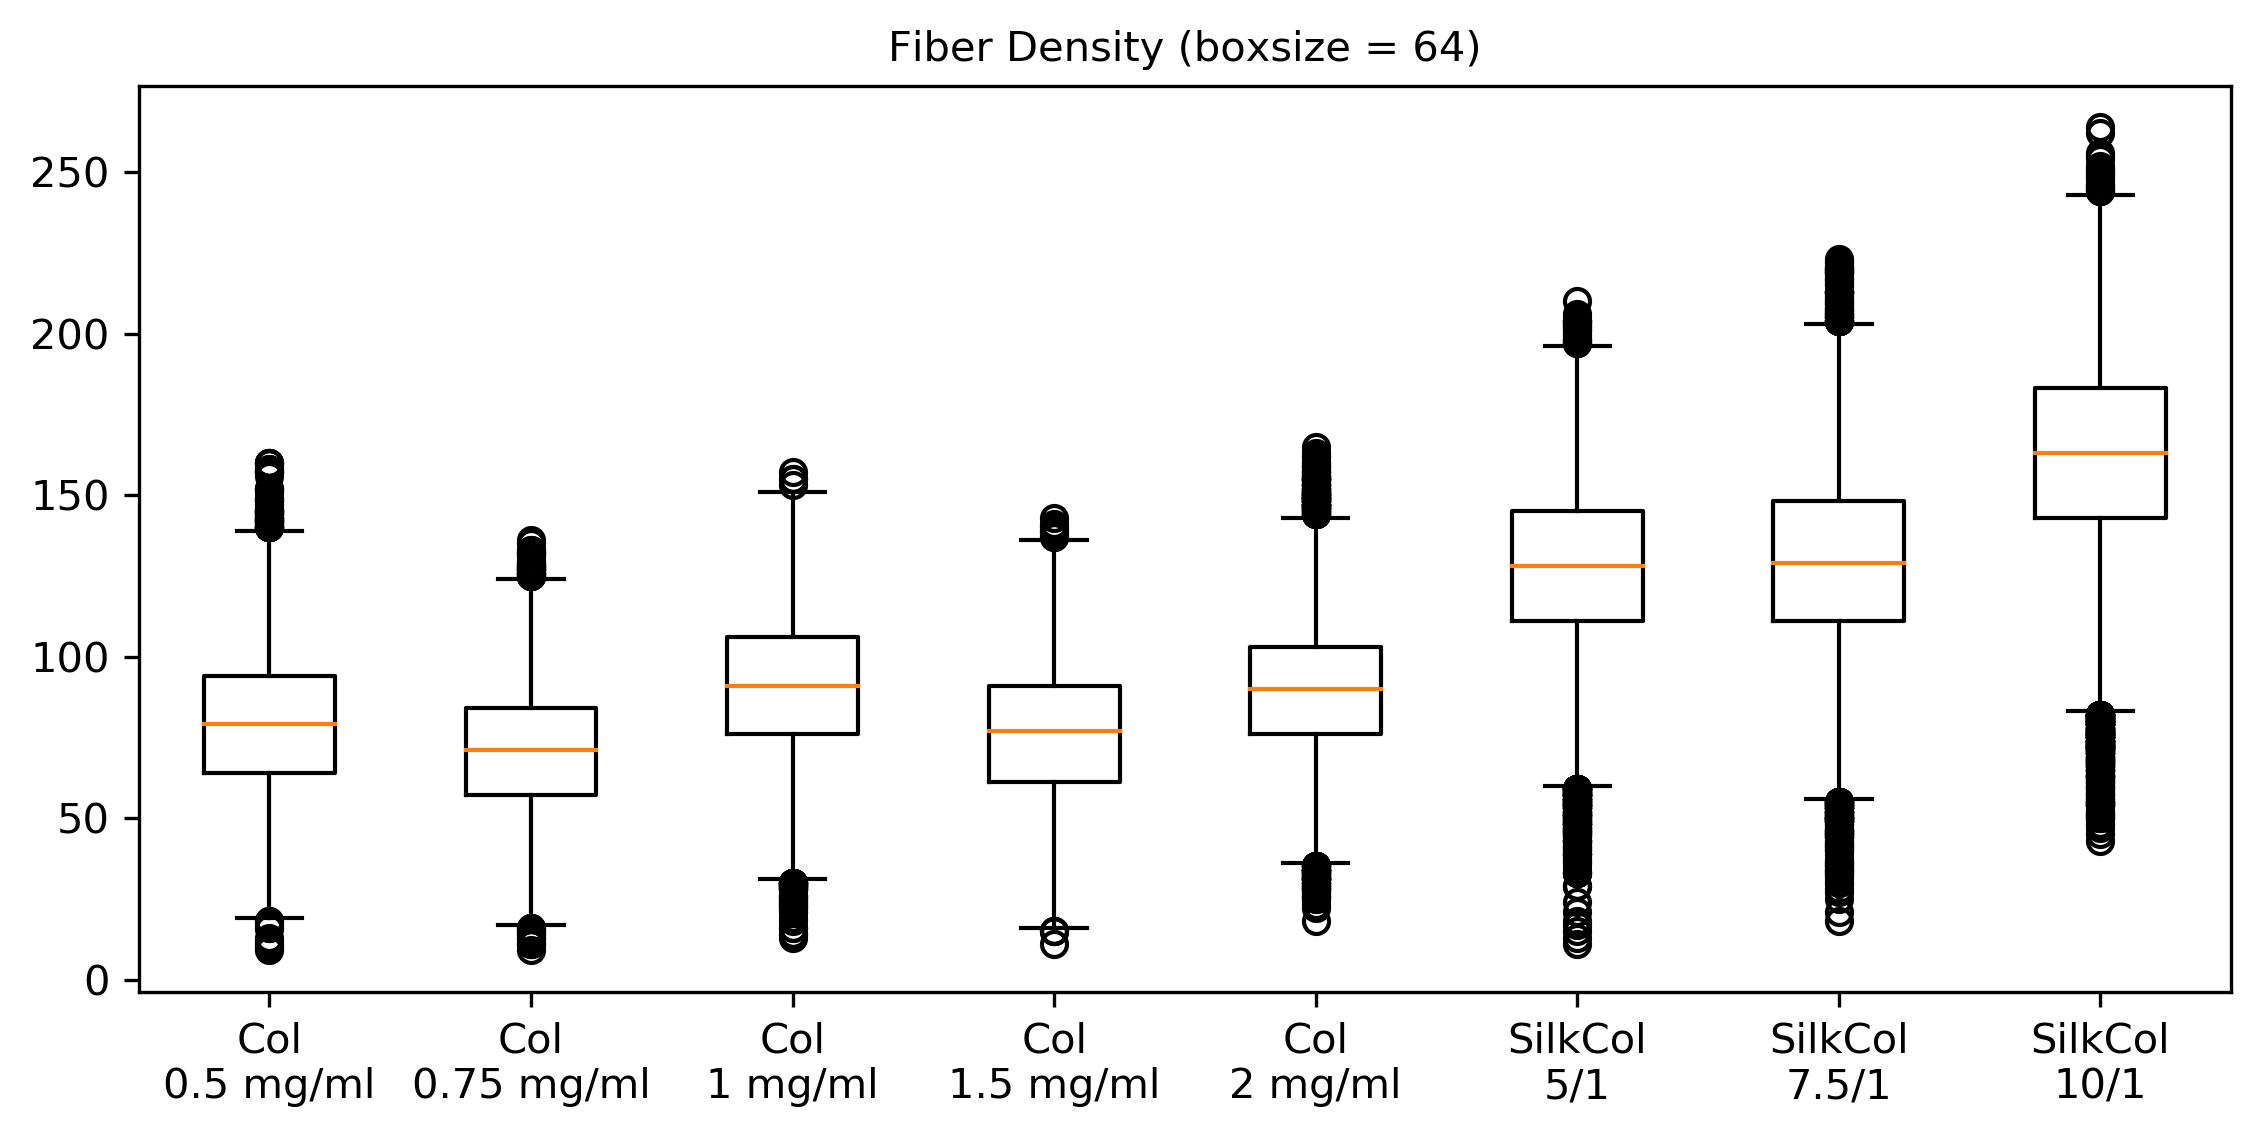

In [4]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title('Fiber Density (boxsize = 64)', fontsize=10)
plt.boxplot(den_vals, labels=conditions);

In [5]:
len_vals = list()
wid_vals = list()
fib_density_box = list()
fib_density_box_img = list()
mesh_area = list()
segmented_fibers = list()

boxsize = 50
px2um = 0.318
patch_area_um = (boxsize**2) * (px2um**2)

for i in range(len(wells)):

    well = wells[i]
    
    p_file = well + "_fib_stats.pickle"
    with open(p_file, "rb") as f:
        (fib_len_um, fib_wid_um) = pickle.load(f)
    len_vals.append(fib_len_um)
    wid_vals.append(fib_wid_um)
    
    p_file = well + "_fibcount_boxsize_50.pickle"
    with open(p_file, "rb") as f:
        num_fibs = pickle.load(f)
    fib_density_box.append(num_fibs)
    
    p_file = well + "_boxcount.pickle"
    with open(p_file, "rb") as f:
        (boxcount_res, area_per_fiber, numfibs) = pickle.load(f)
    mesh_area.append(area_per_fiber)
    segmented_fibers.append(numfibs)
    
    p_file = well + "_imgcount.pickle"
    with open(p_file, "rb") as f:
        (box_sizes, avg_thresh_list, box_50_prop) = pickle.load(f)
    fib_density_box_img.append(box_50_prop)

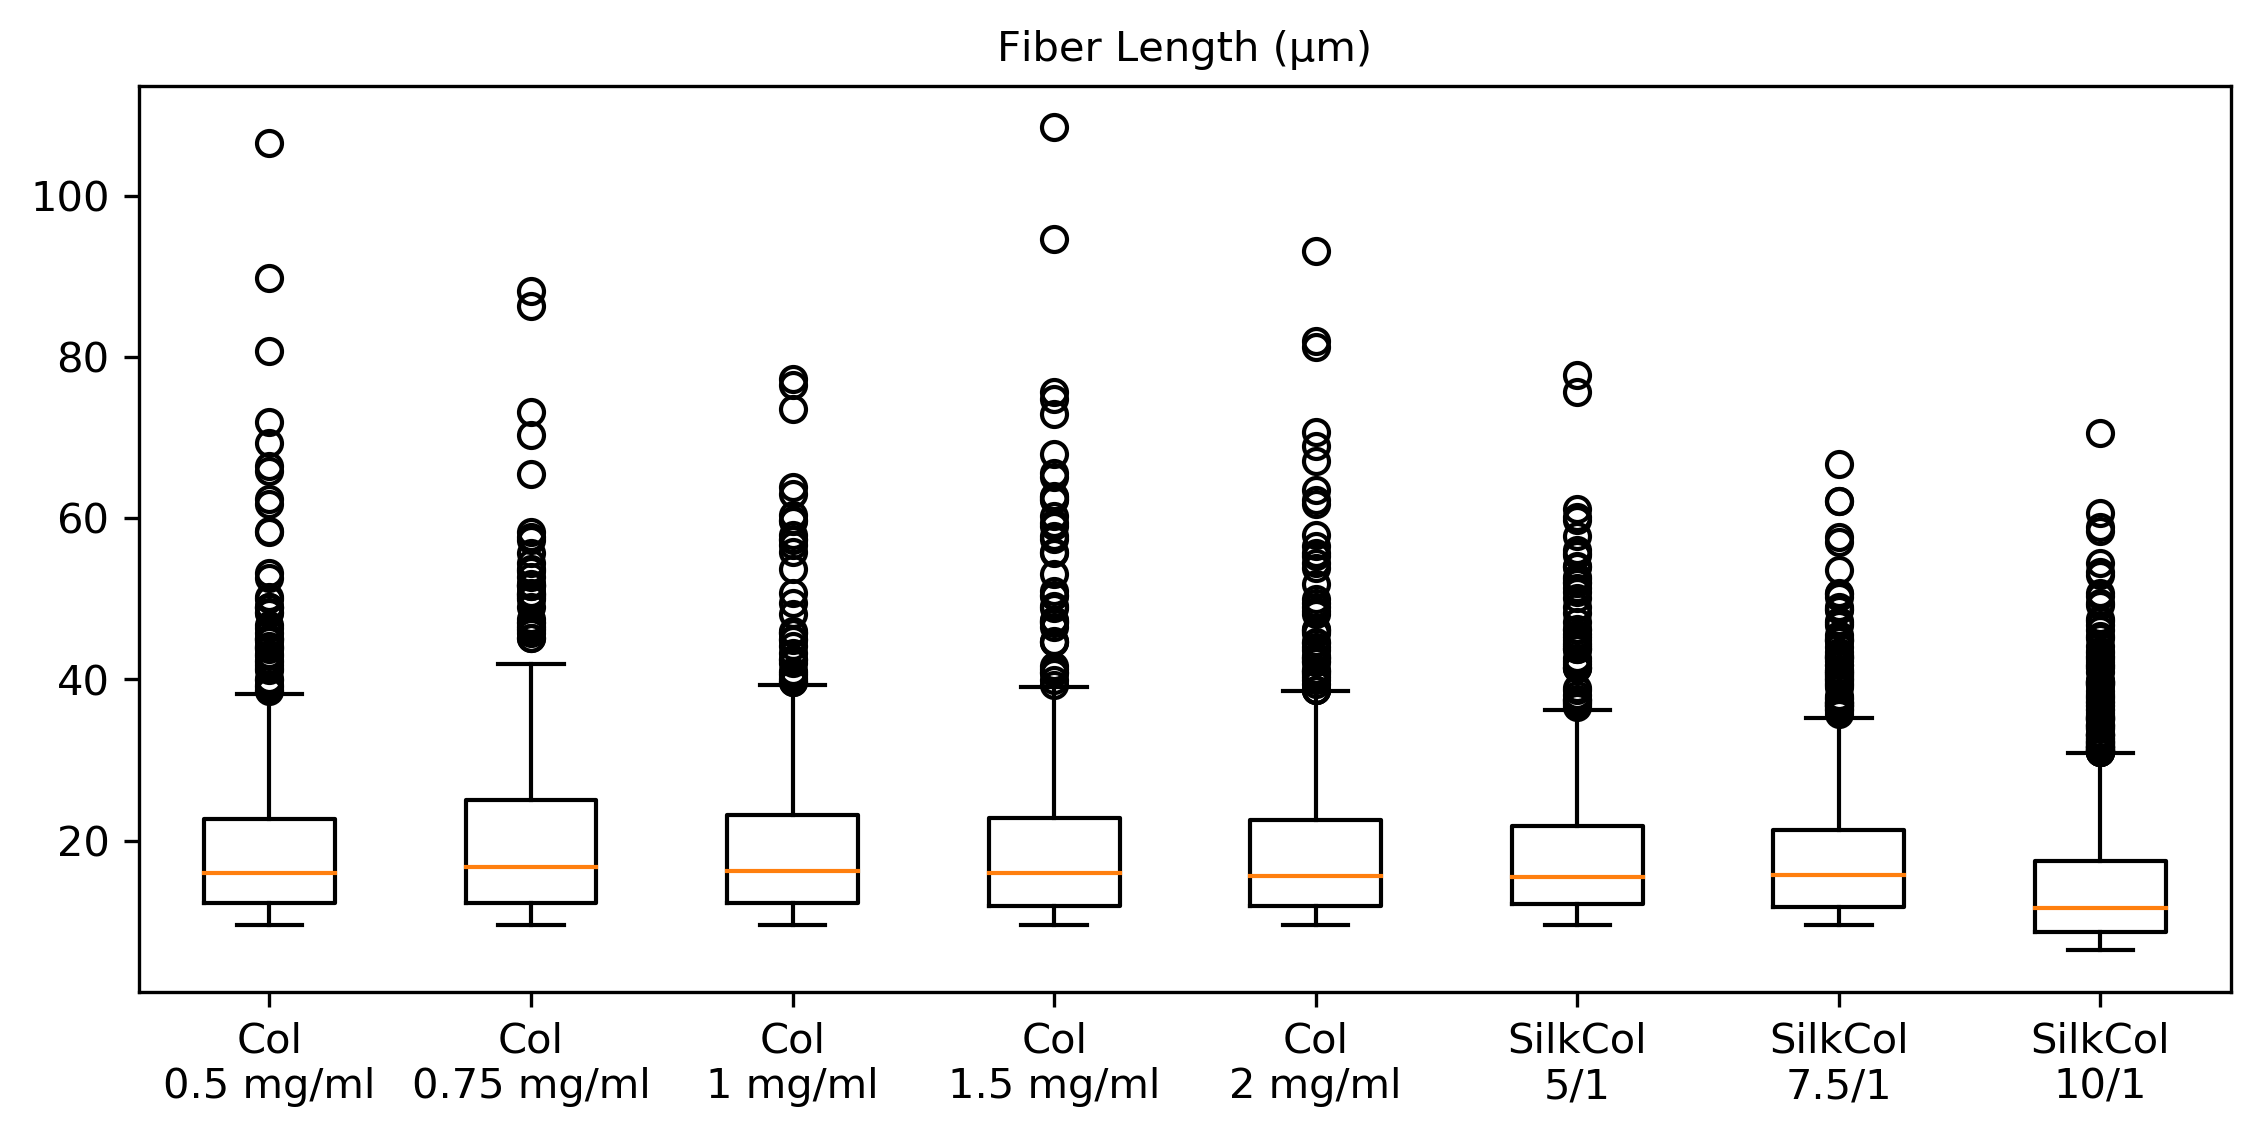

In [6]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title(u'Fiber Length (μm)', fontsize=10)
plt.boxplot(len_vals, labels=conditions);

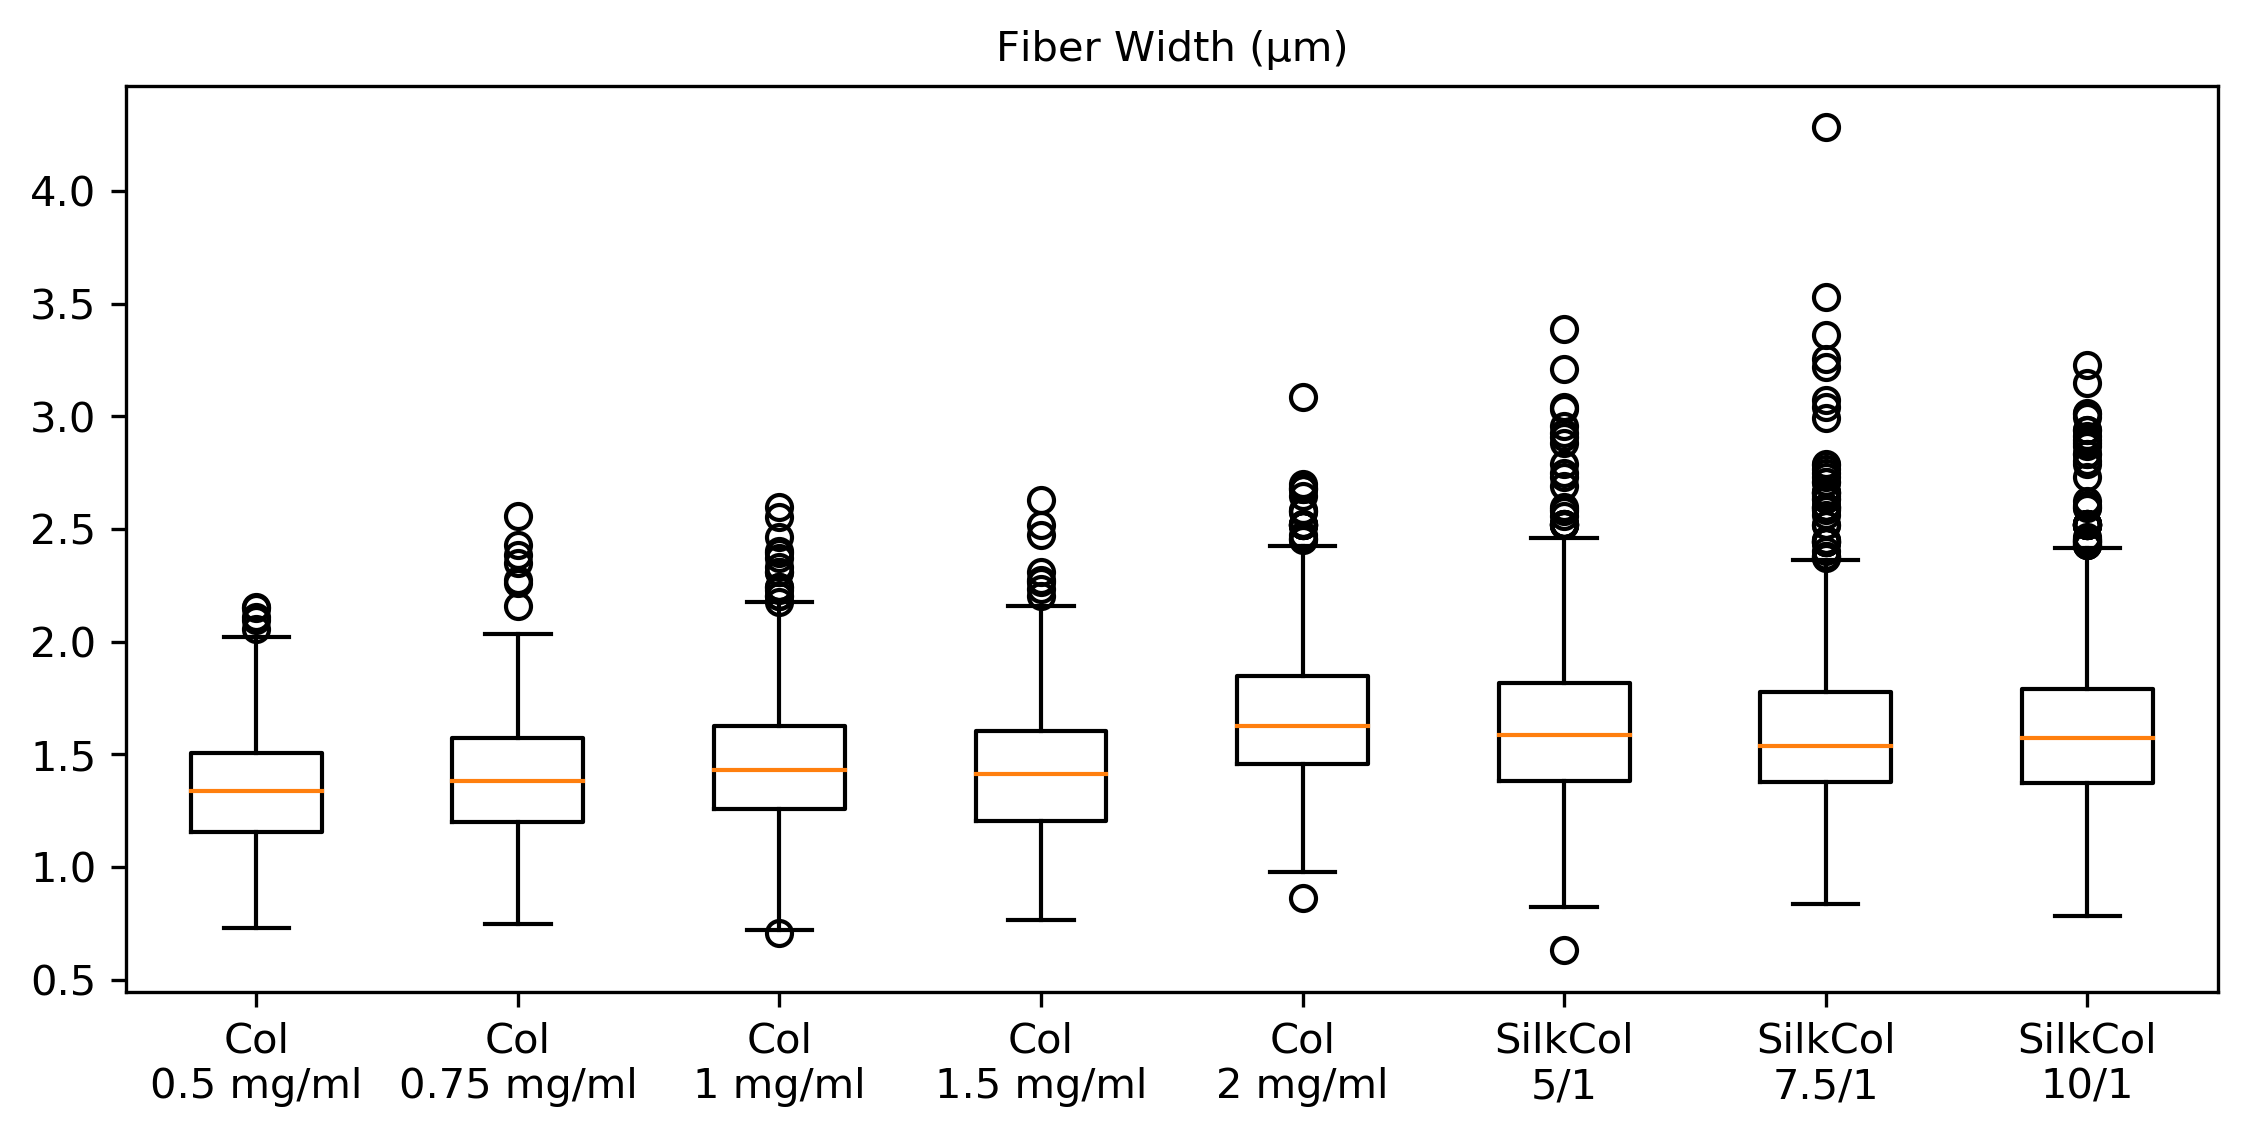

In [7]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title(u'Fiber Width (μm)', fontsize=10)
plt.boxplot(wid_vals, labels=conditions);

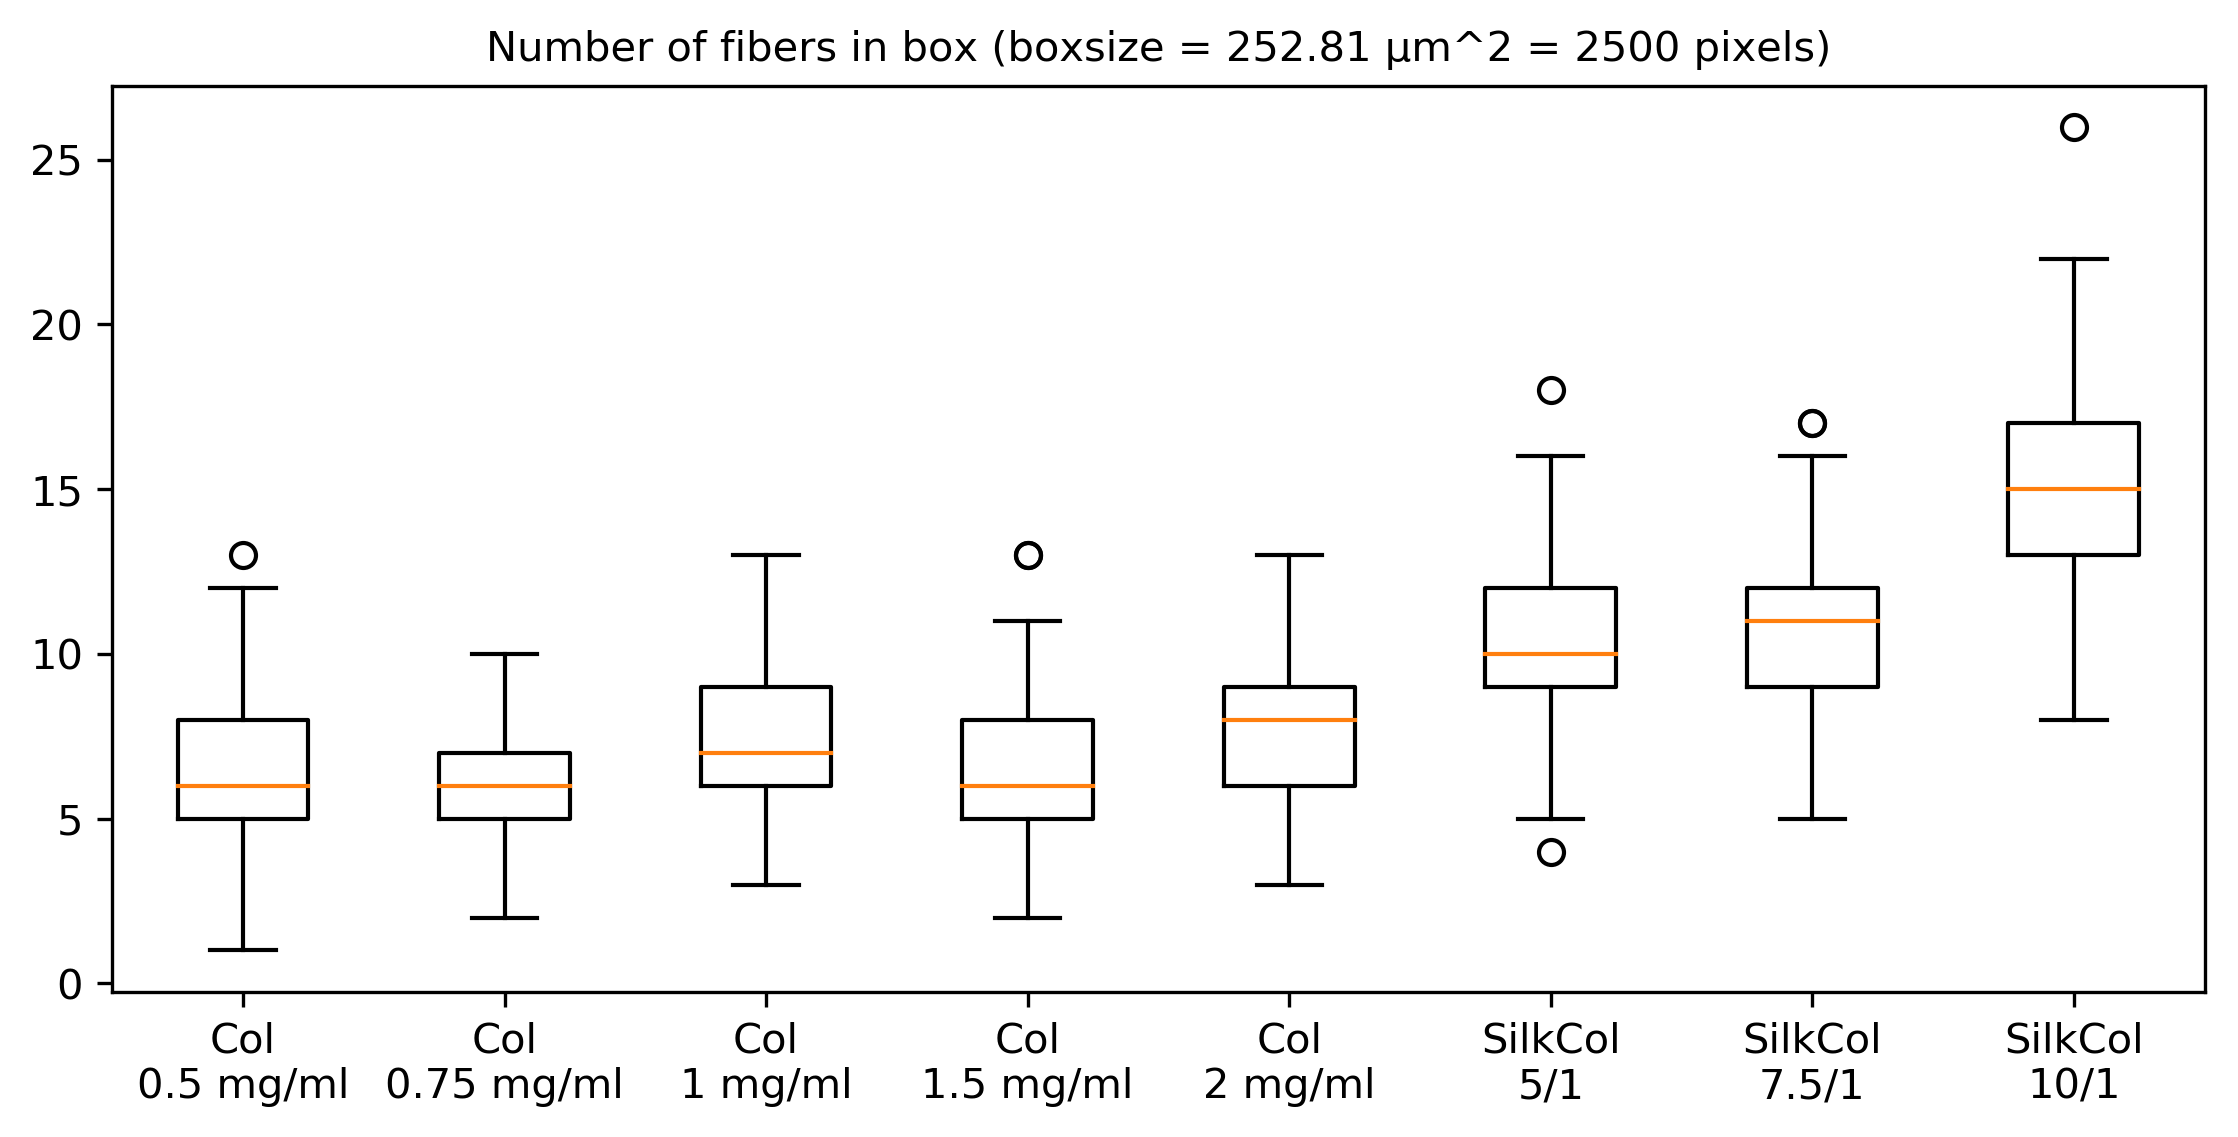

In [11]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title(u'Number of fibers in box (boxsize = ' + repr(patch_area_um) + u' μm^2 = 2500 pixels)', fontsize=10)
plt.boxplot(fib_density_box, labels=conditions);

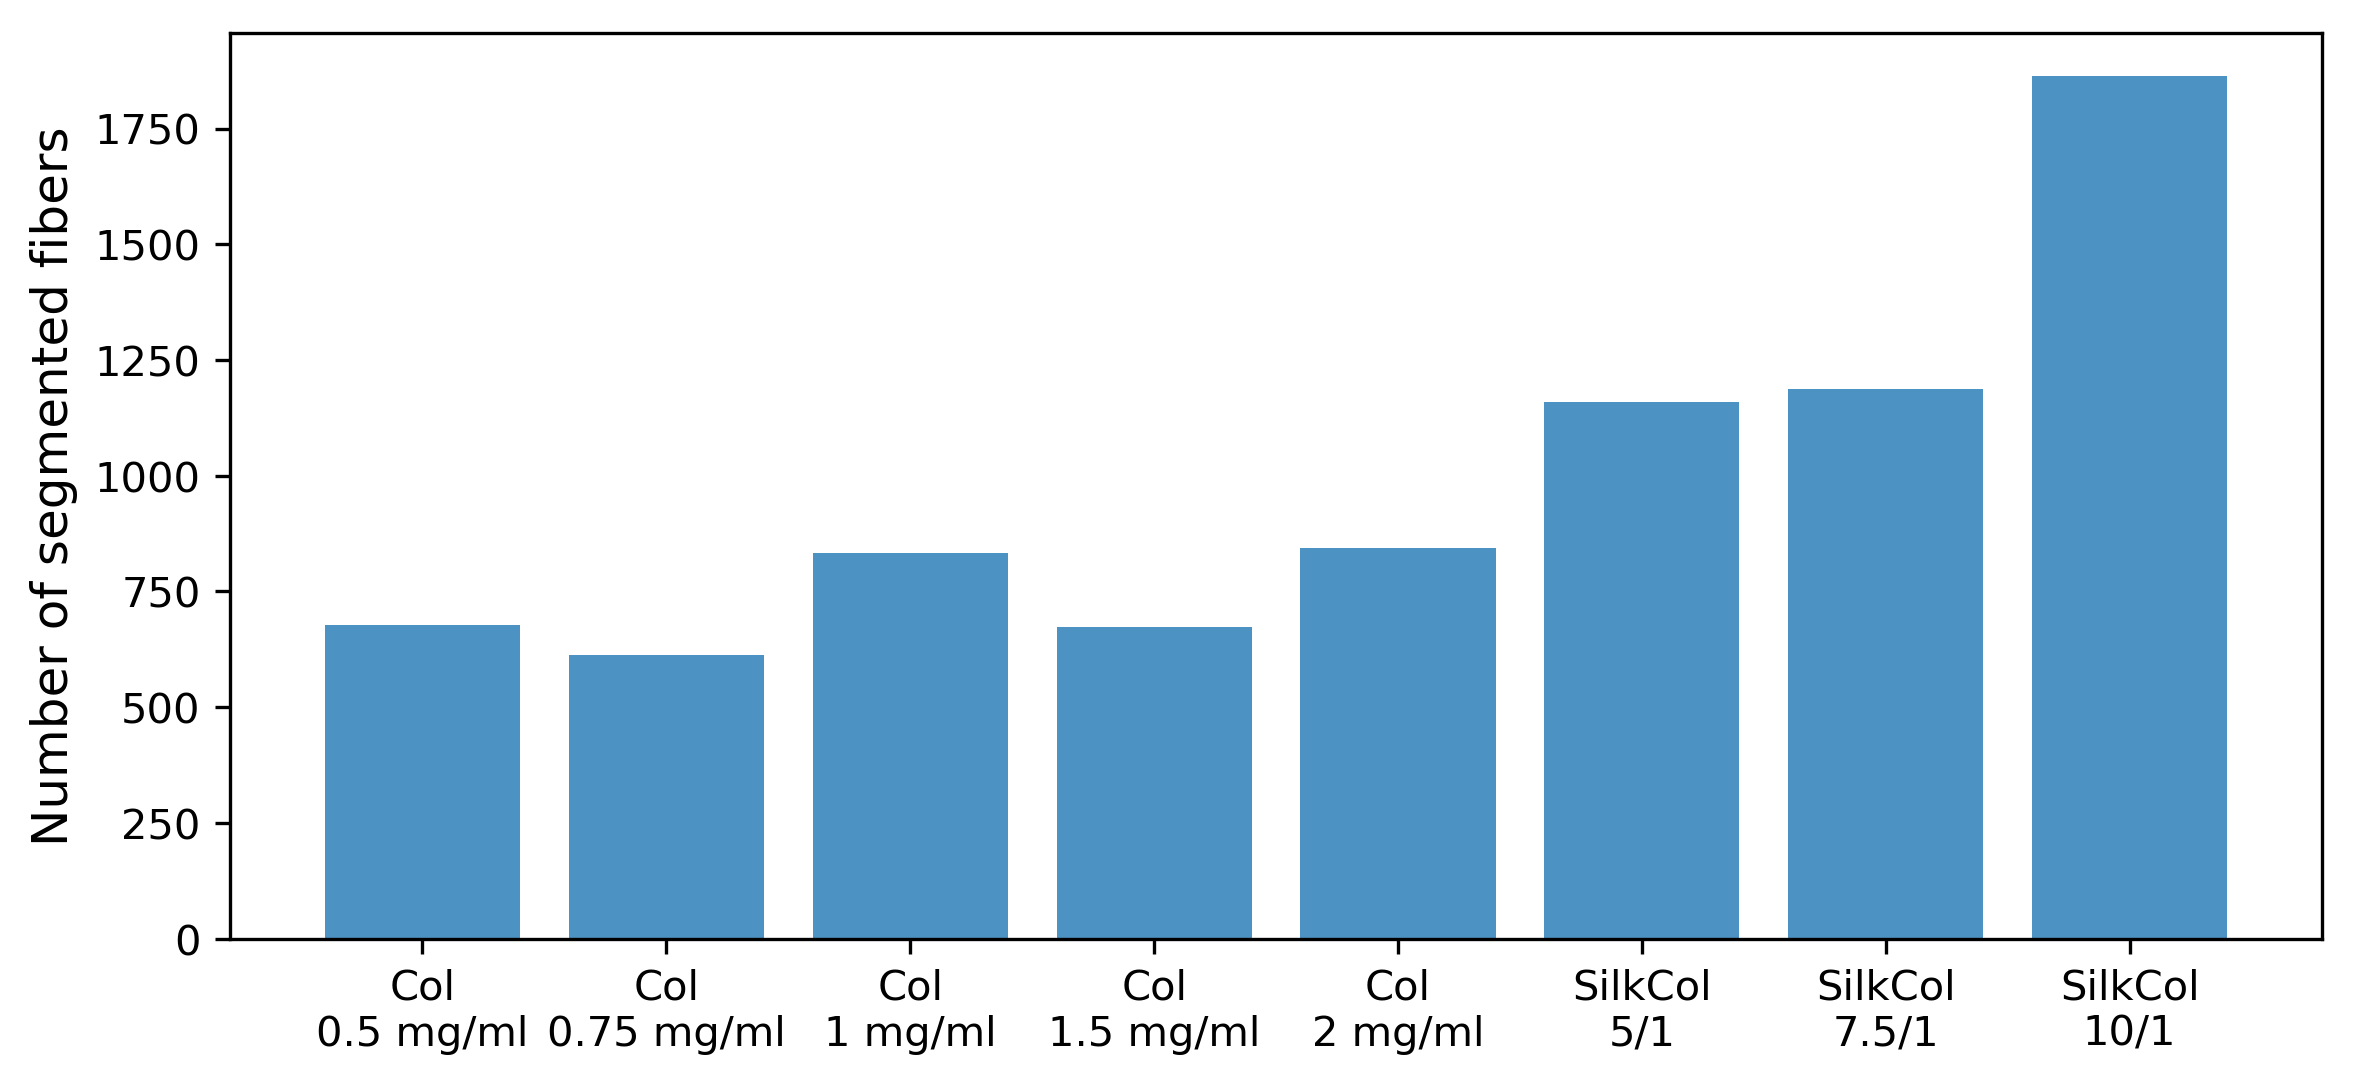

In [9]:
y_pos = np.arange(len(conditions))
plt.figure(figsize=(9,4), dpi=300)
plt.bar(y_pos, segmented_fibers, align='center', alpha=0.8)
plt.xticks(y_pos, conditions)
plt.ylabel('Number of segmented fibers', fontsize=12)
plt.show()

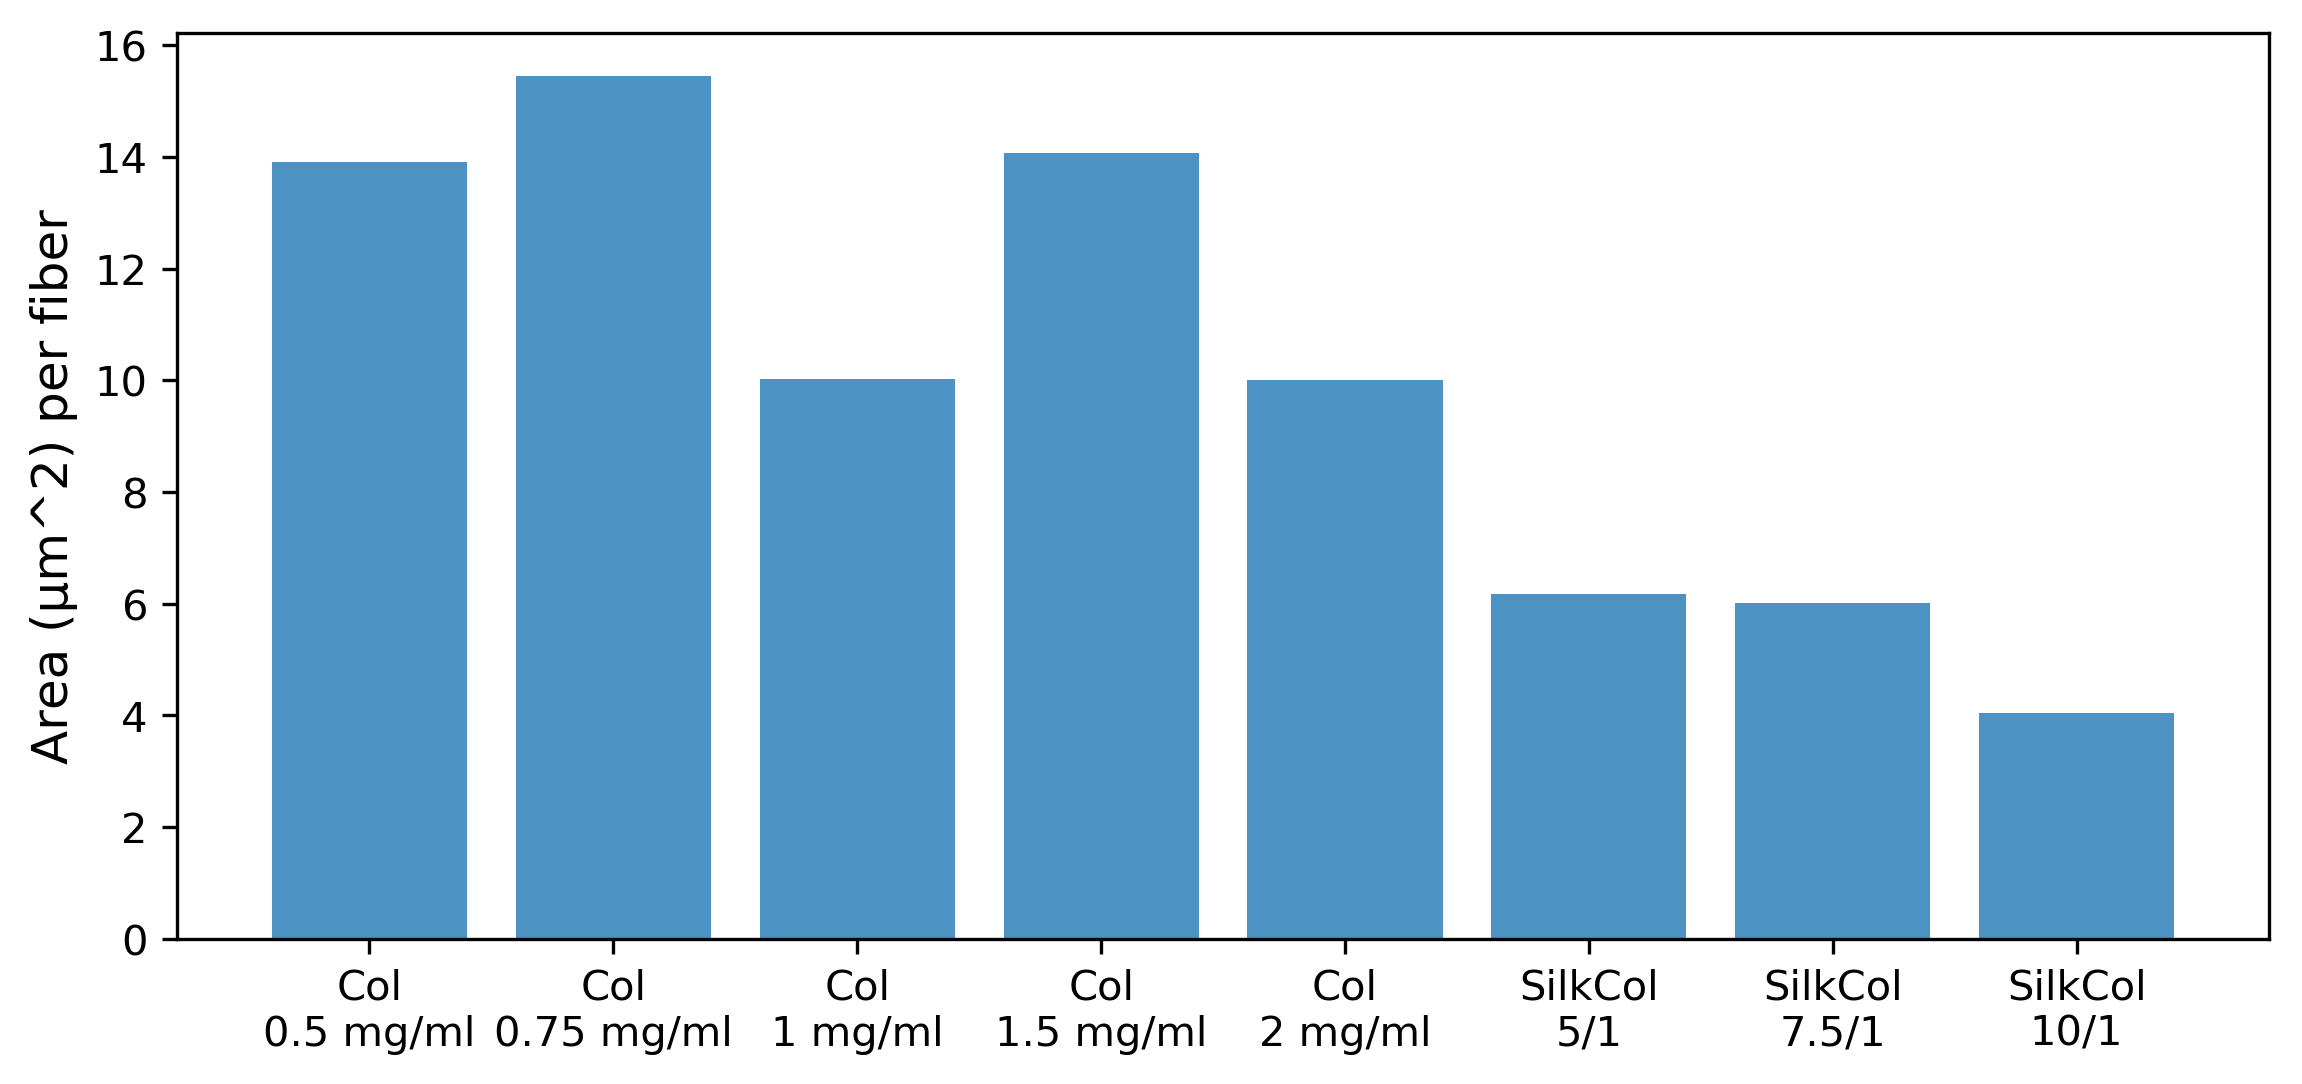

In [10]:
y_pos = np.arange(len(conditions))
plt.figure(figsize=(9,4), dpi=300)
plt.bar(y_pos, mesh_area, align='center', alpha=0.8)
plt.xticks(y_pos, conditions)
plt.ylabel(u'Area (μm^2) per fiber', fontsize=12)
plt.show()

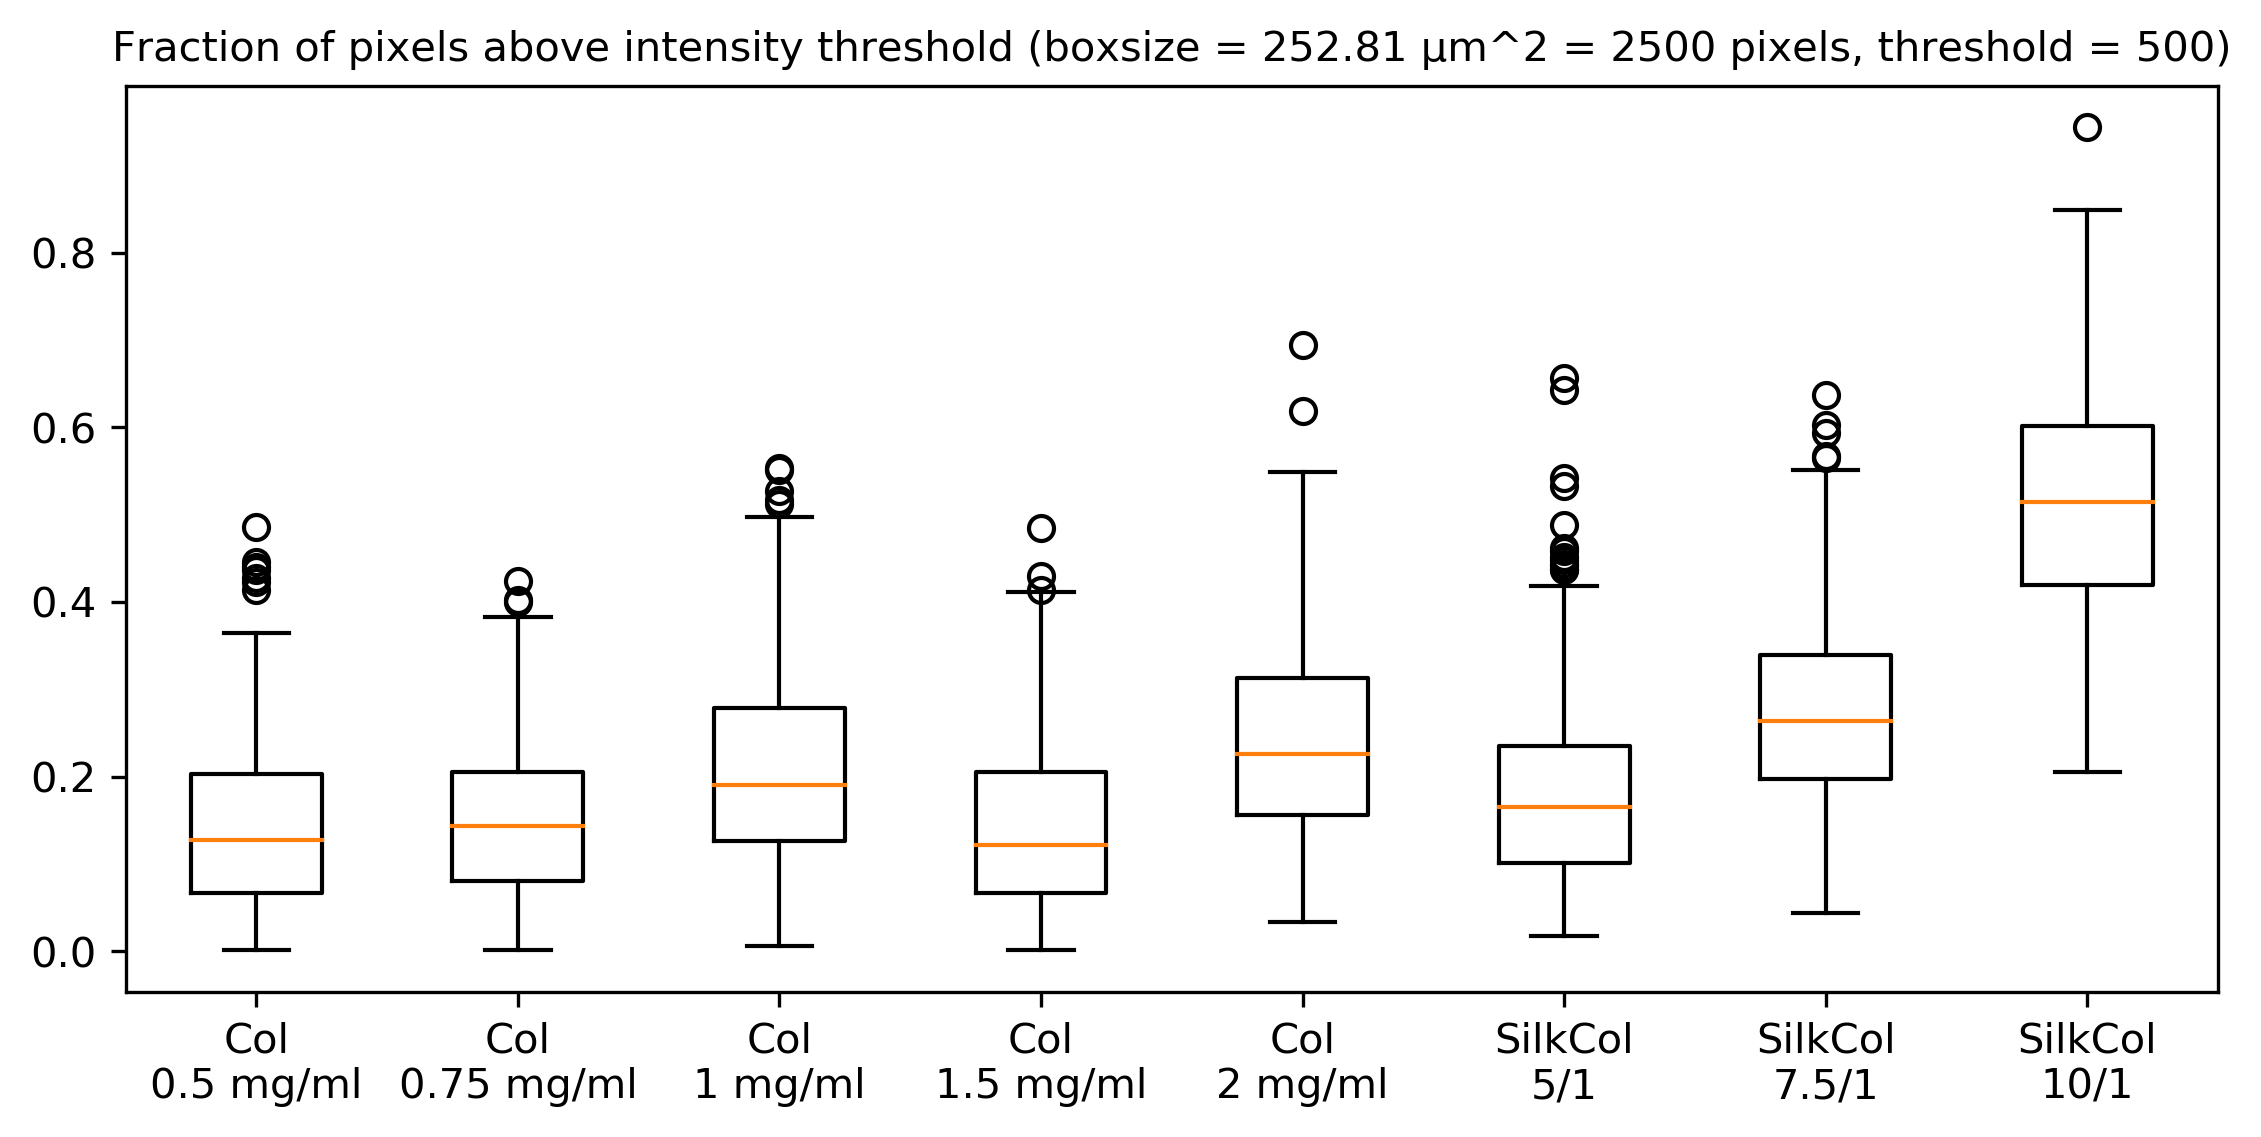

In [14]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title(u'Fraction of pixels above intensity threshold ' + 
          '(boxsize = ' + repr(patch_area_um) + u' μm^2 = 2500 pixels, threshold = 500)', fontsize=10)
plt.boxplot(fib_density_box_img, labels=conditions);